In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv("data/creditcard.csv")

In [2]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature Importance Random Forest Classifier

In [4]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print(f"model score on training data: {rf.score(X_train, y_train)}")
print(f"model score on testing data: {rf.score(X_test, y_test)}")

model score on training data: 1.0
model score on testing data: 0.9995201479348805


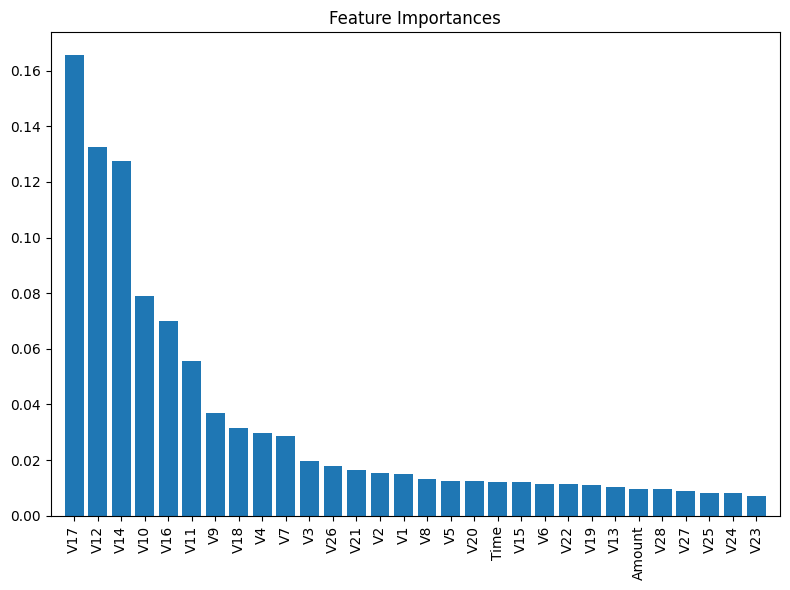

In [7]:
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [6]:
# Evaluate model performance with and without specific features
def evaluate_model(features):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]
    rf.fit(X_train_subset, y_train)
    y_pred = rf.predict(X_test_subset)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return acc, f1

# All features
all_features = X.columns.tolist()
all_acc, all_f1 = evaluate_model(all_features)
print(f"All features - Accuracy: {all_acc}, F1 Score: {all_f1}")

# Without 'Time' and 'Amount'
reduced_features = X.drop(['Time', 'Amount'], axis=1).columns.tolist()
reduced_acc, reduced_f1 = evaluate_model(reduced_features)
print(f"Without 'Time' and 'Amount' - Accuracy: {reduced_acc}, F1 Score: {reduced_f1}")

# Identify least important V<N> features
least_important_features = [X_train.columns[indices[-i-1]] for i in range(5)]  # Adjust the number as needed
print("Least important features:", least_important_features)

# Without least important V<N> features
important_features = [f for f in X.columns if f not in least_important_features]
important_acc, important_f1 = evaluate_model(important_features)
print(f"Without least important features - Accuracy: {important_acc}, F1 Score: {important_f1}")


All features - Accuracy: 0.9995201479348805, F1 Score: 0.8452830188679246
Without 'Time' and 'Amount' - Accuracy: 0.9994967405170698, F1 Score: 0.8352490421455939
Least important features: ['V23', 'V24', 'V25', 'V27', 'V28']
Without least important features - Accuracy: 0.9995201479348805, F1 Score: 0.8452830188679246
